# Proyek Analisis Data: [AIR QUALITY]
- **Nama:** [SAHRUL NURAHMAN]
- **Email:** [m211b4ky4009@bangkit.academy]
- **ID Dicoding:** [Sahrul250]

## Menentukan Pertanyaan Bisnis

- Bagaimana variasi kuliatas udara antar stasiun?
- Apa korelasi antara parameter meteorologi dengan kualitas udara pada stasiun?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [ ]:
link_data = '/content/drive/MyDrive/Tugas_sahrul/data/PRSA_Data_20130301-20170228'
files = [file for file in os.listdir(link_data) if file.endswith('.csv')]
data = []

for file in files:
    df = pd.read_csv(os.path.join(link_data, file))
    df['station'] = os.path.splitext(file)[0]
    data.append(df)

combined_data = pd.concat(data, ignore_index=True)
cd = combined_data.copy()

In [ ]:
cd.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [ ]:
cd.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
420767,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


**Insight:**
Dataset ini merupakan rekaman kualitas udara dari berbagai stasiun, berdasarkan namanya data ini diambil pada stasiun china. data diambil setiap jam dari tahun 2013 sampai dengan 2017


### Assessing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
missing_data = cd.isna().sum()
print('Jumlah missing data dalam setiap kolom:')
print(missing_data)

**Insight:**
Dataset ini merupakan kumpulan data parameter cuaca seperti suhu, tekanan, embun udara, curah hujan, arah angin, serta kecepatan rata - rata angin dengan parameter kualitas udara seperti jumlah partikel kasar dan halus, konsentrasi SO2, NO2, CO, dan O3 dari berbagai stasiun yang diukur setiap jam dari tahun 2013 sampai dengan 2017

### CLEANING DATA

In [ ]:
cd_cleaned = cd.dropna()

In [ ]:
duplicate_data = cd.duplicated()
print('Jumlah data duplikat:', duplicate_data.sum())

Jumlah data duplikat: 0


In [ ]:
print(f'Jumlah data sebelum dibersihkan: {cd.shape}')
print(f'Jumlah data setelah dibersihkan: {cd_cleaned.shape}')

Jumlah data sebelum dibersihkan: (420768, 18)
Jumlah data setelah dibersihkan: (382168, 18)


In [ ]:
print('Jumlah data kosong pada setiap kolom setelah dibersikan')
print(cd_cleaned.isnull().sum())

Jumlah data kosong pada setiap kolom setelah dibersikan
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


**Insight:**
- Cukup banyak data yang kosong sehingga harus dibuang
- Tidak ada data yang terduplikasi

### EXPLORATORY DATA ANALYSIS

In [ ]:
cd_cleaned.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000,382168.000000
mean,17955.931070,2014.714905,6.475087,15.711308,11.575184,79.432383,104.573837,15.634814,50.570068,1229.940563,57.376676,13.518694,1010.813471,2.417195,0.065030,1.738031
std,10001.787087,1.160266,3.449317,8.803064,6.933552,80.154901,91.379446,21.306103,35.062086,1157.151476,56.709013,11.425355,10.452381,13.798402,0.823901,1.241152
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-19.900000,982.400000,-36.000000,0.000000,0.000000
25%,9610.000000,2014.000000,3.000000,8.000000,6.000000,20.000000,36.000000,2.000000,23.000000,500.000000,10.495800,3.100000,1002.400000,-9.000000,0.000000,0.900000
50%,18103.000000,2015.000000,6.000000,16.000000,12.000000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.400000,1010.400000,3.000000,0.000000,1.400000
75%,26515.000000,2016.000000,9.000000,23.000000,18.000000,111.000000,145.000000,19.000000,71.000000,1500.000000,82.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [ ]:
cd_corr = cd_cleaned.drop(['No', 'year', 'month', 'day', 'hour', 'wd', 'station'], axis=1)
cd_corr.corr()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.884324,0.482209,0.670753,0.792041,-0.151149,-0.128907,0.013717,0.118009,-0.015268,-0.275686
PM10,0.884324,1.000000,0.466561,0.653577,0.703535,-0.114345,-0.094793,-0.021942,0.072706,-0.026885,-0.185789
SO2,0.482209,0.466561,1.000000,0.501317,0.535289,-0.167093,-0.320991,0.218994,-0.266446,-0.040618,-0.109259
NO2,0.670753,0.653577,0.501317,1.000000,0.705651,-0.476812,-0.276387,0.172287,-0.028276,-0.043946,-0.402566
CO,0.792041,0.703535,0.535289,0.705651,1.000000,-0.315060,-0.323402,0.183800,-0.054173,-0.013302,-0.297760
O3,-0.151149,-0.114345,-0.167093,-0.476812,-0.315060,1.000000,0.597098,-0.447437,0.313267,0.023194,0.296714
TEMP,-0.128907,-0.094793,-0.320991,-0.276387,-0.323402,0.597098,1.000000,-0.812456,0.820672,0.037182,0.026664
PRES,0.013717,-0.021942,0.218994,0.172287,0.183800,-0.447437,-0.812456,1.000000,-0.750758,-0.060999,0.072249
DEWP,0.118009,0.072706,-0.266446,-0.028276,-0.054173,0.313267,0.820672,-0.750758,1.000000,0.086424,-0.299137
RAIN,-0.015268,-0.026885,-0.040618,-0.043946,-0.013302,0.023194,0.037182,-0.060999,0.086424,1.000000,0.021866


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana variasi kuliatas udara antar stasiun?

Analyzing data for station: Aotizhongxin


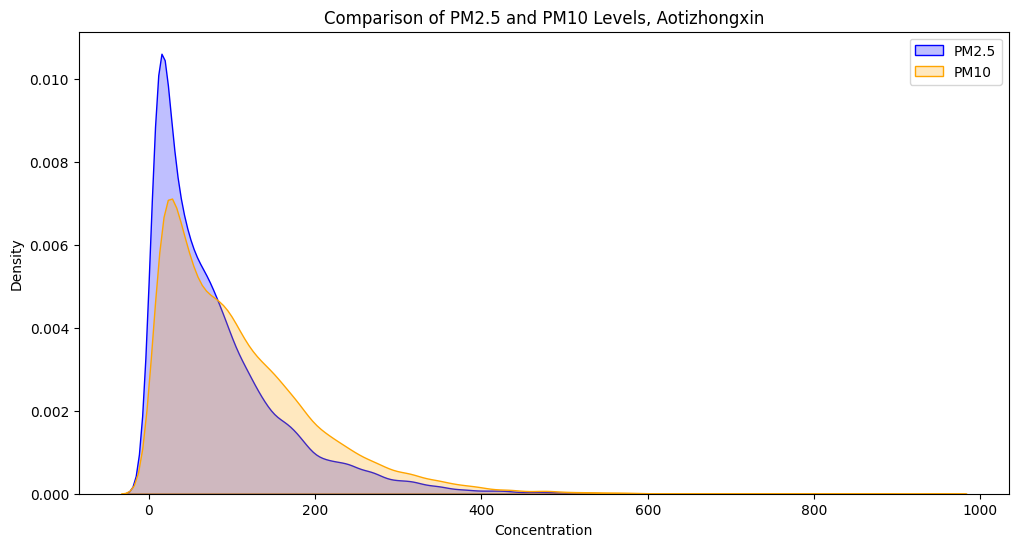

Analyzing data for station: Changping


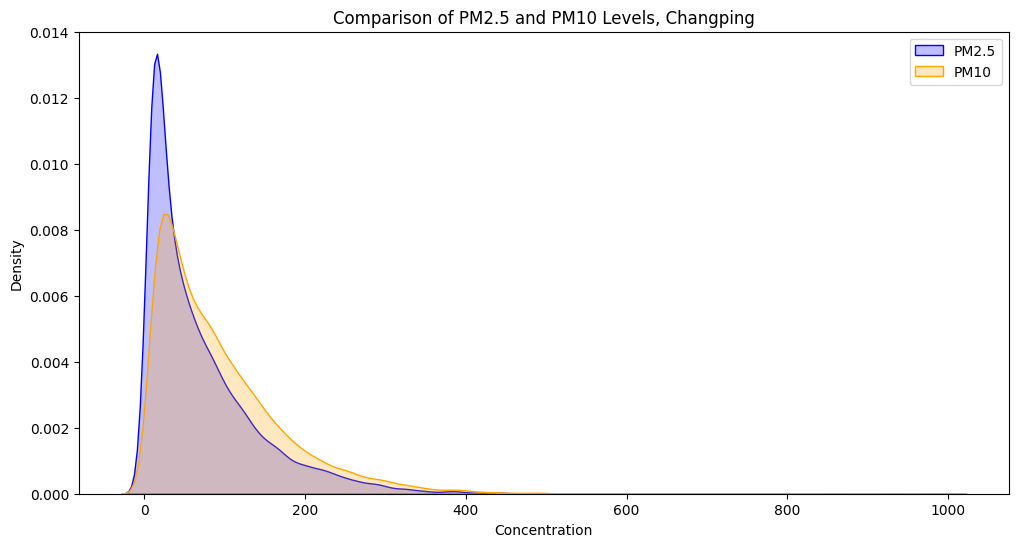

Analyzing data for station: Dingling


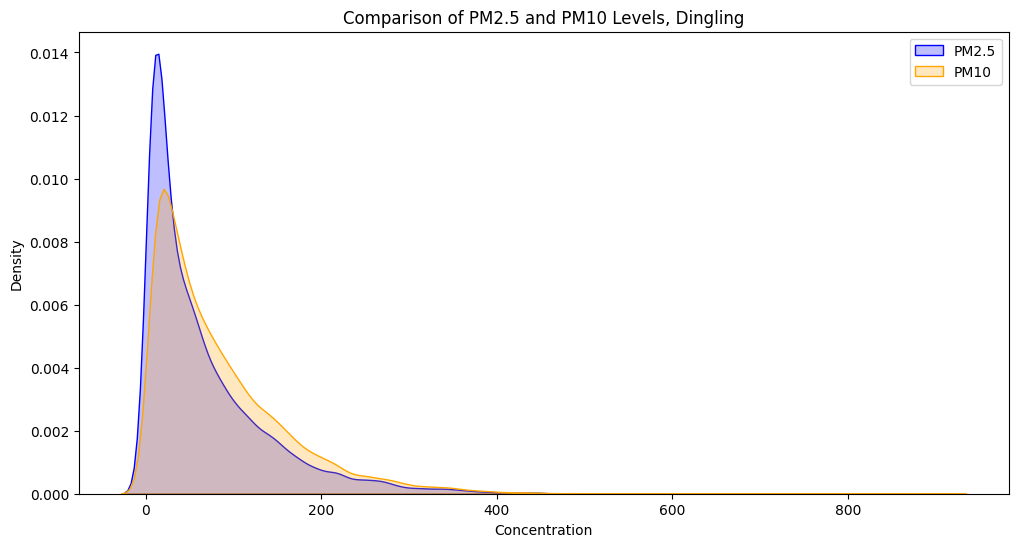

Analyzing data for station: Dongsi


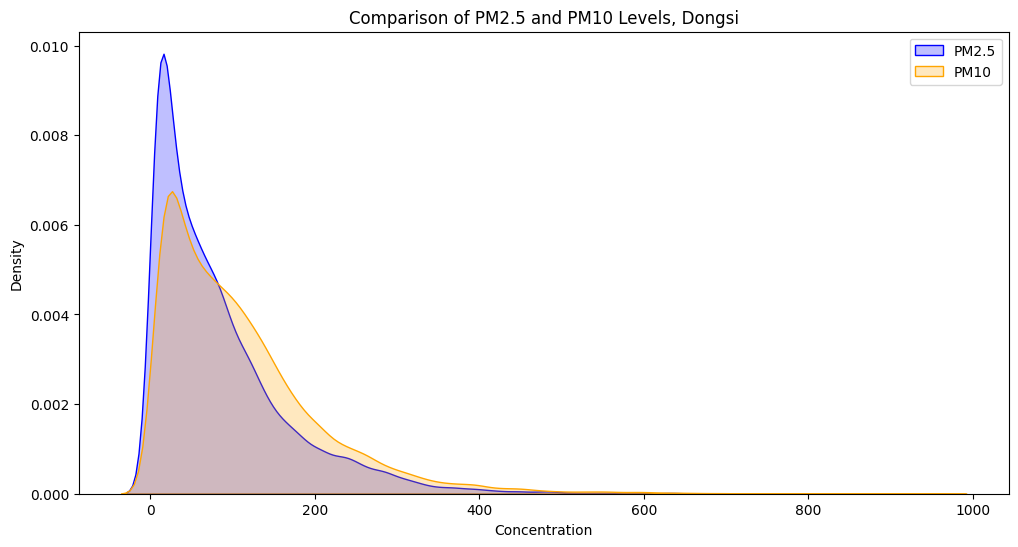

Analyzing data for station: Guanyuan


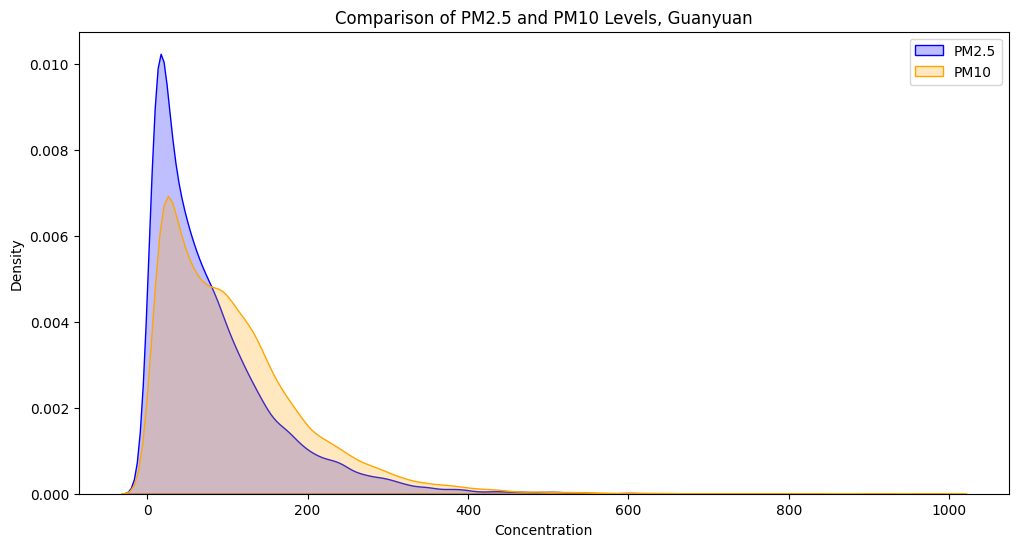

Analyzing data for station: Gucheng


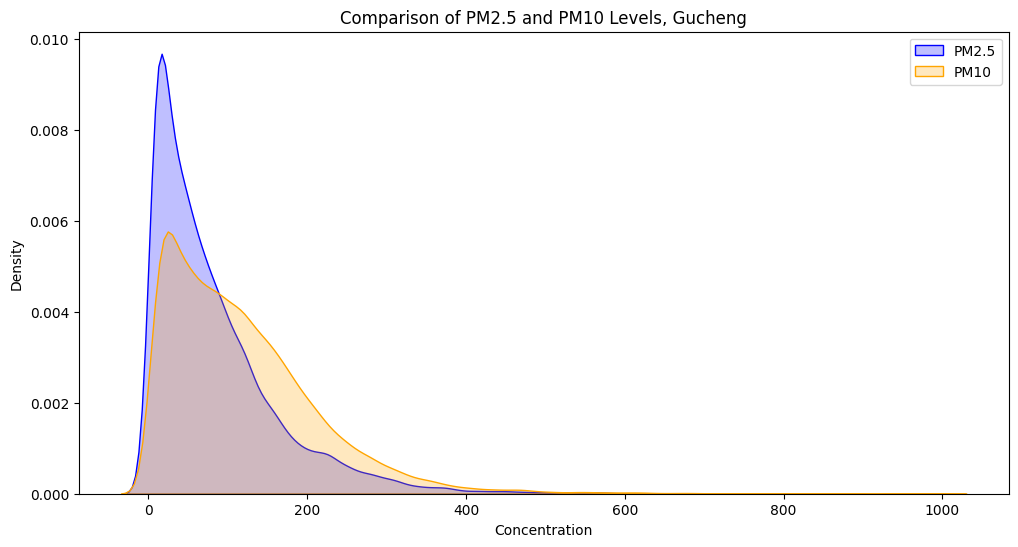

Analyzing data for station: Huairou


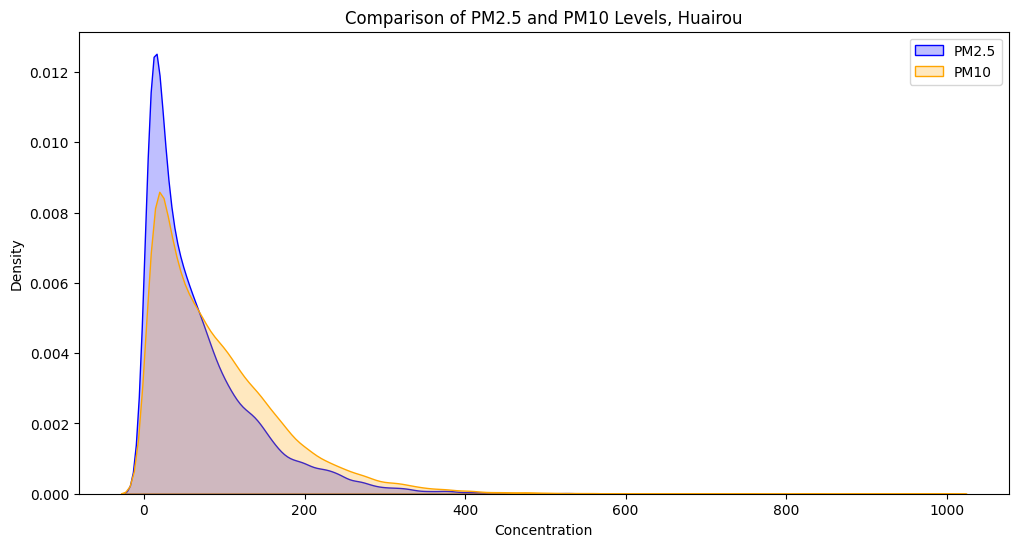

Analyzing data for station: Nongzhanguan


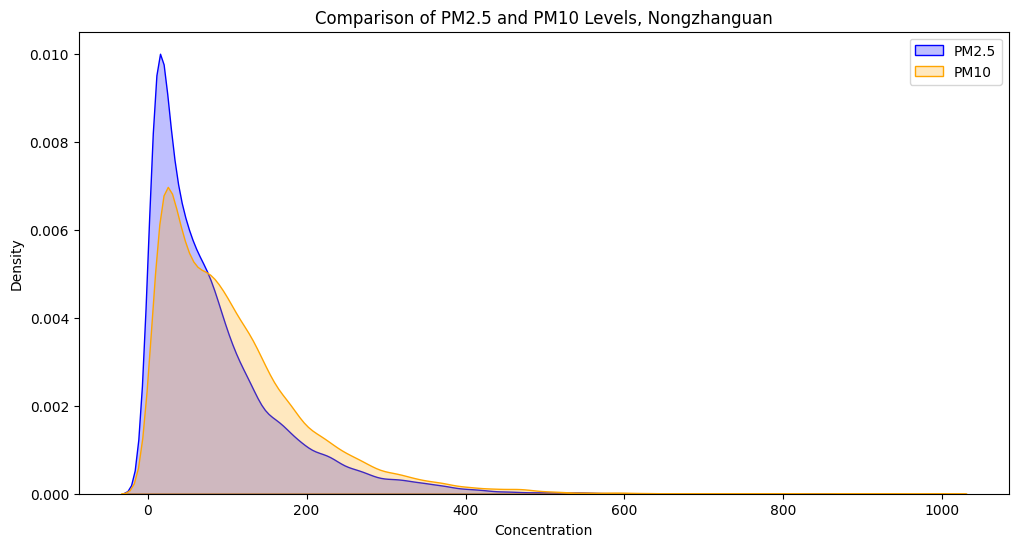

Analyzing data for station: Shunyi


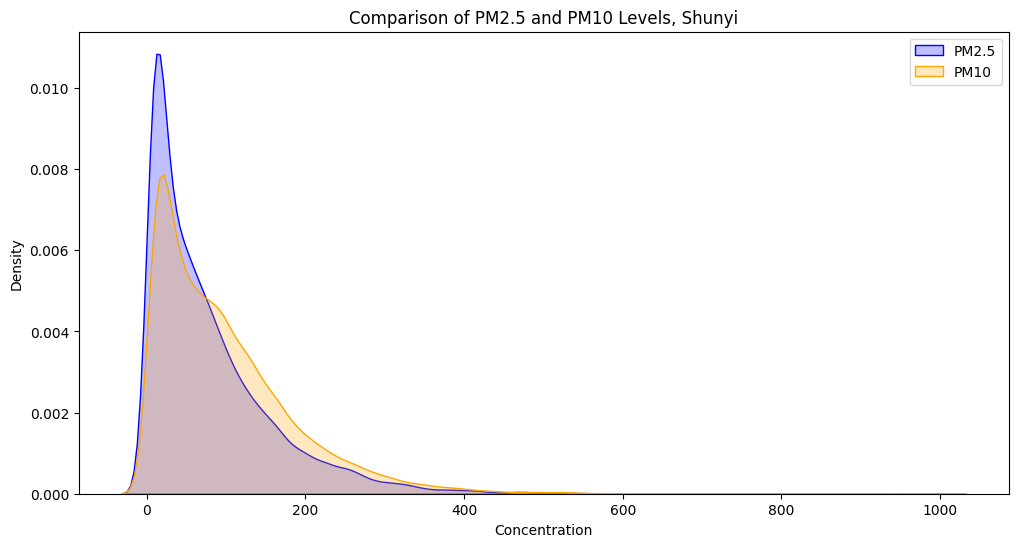

Analyzing data for station: Tiantan


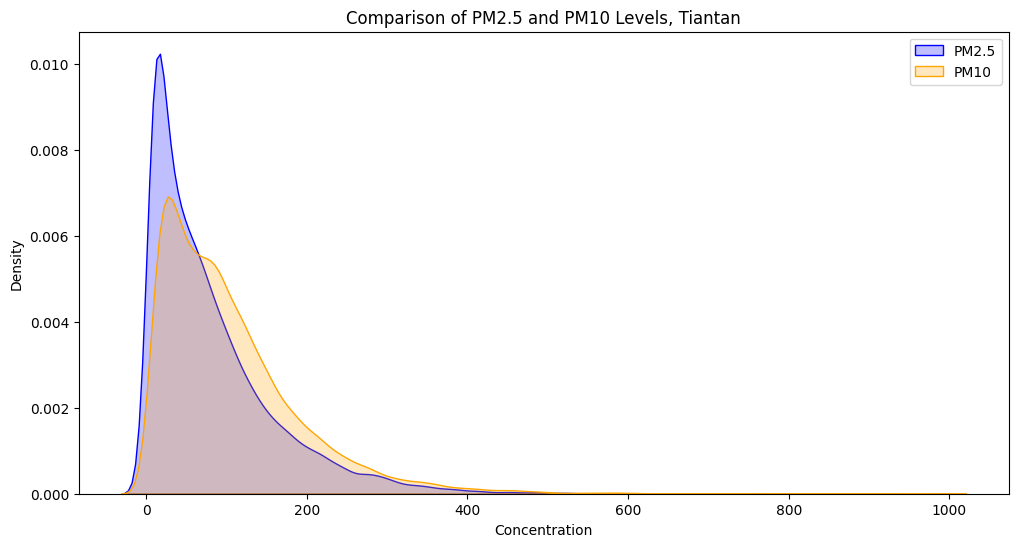

Analyzing data for station: Wanliu


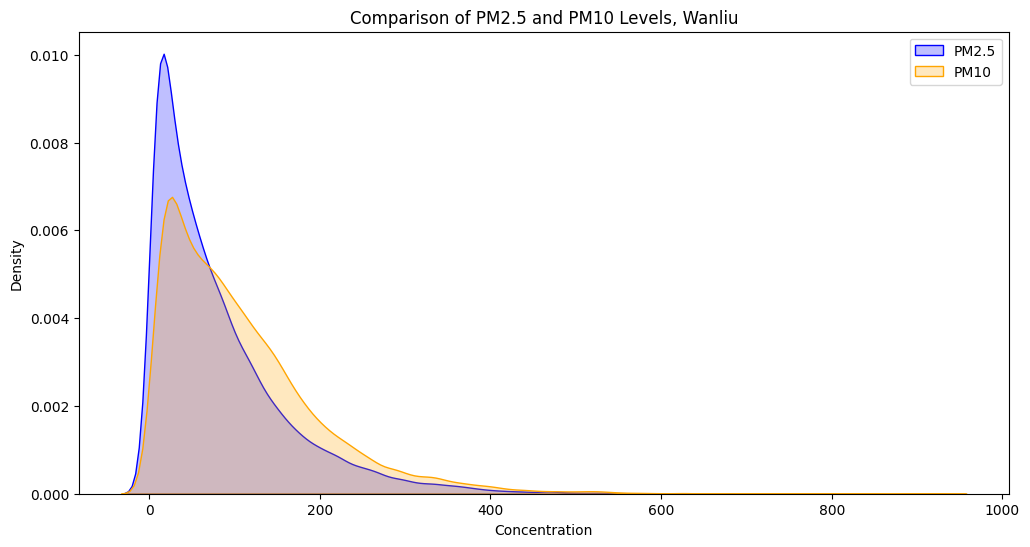

Analyzing data for station: Wanshouxigong


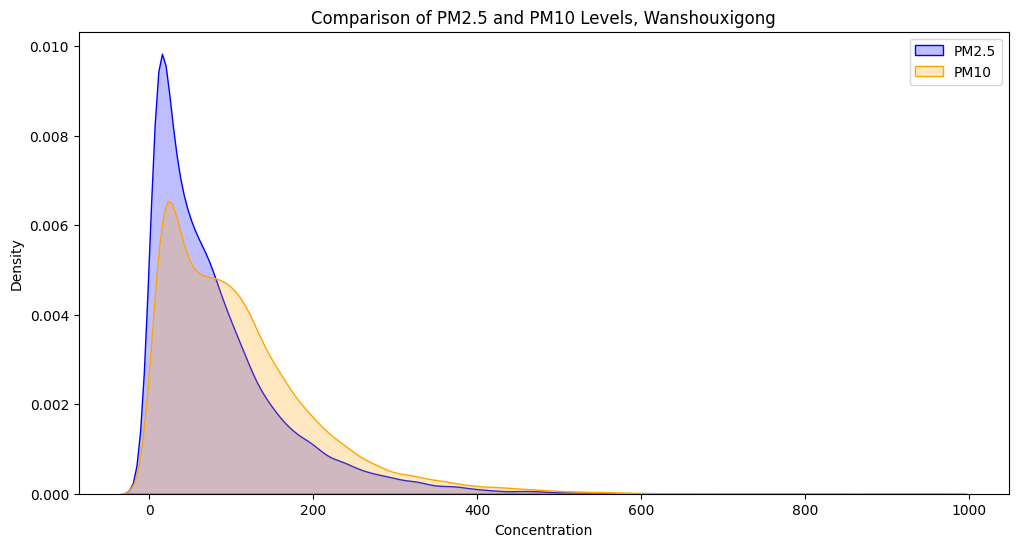

In [12]:
for station, station_data in cd_cleaned.groupby('station'):
    print(f"Analyzing data for station: {station}")
    plt.figure(figsize=(12,6))
    sns.kdeplot(station_data['PM2.5'], label='PM2.5', color='blue', fill=True)
    sns.kdeplot(station_data['PM10'], label='PM10', color='orange', fill=True)

    plt.title(f'Comparison of PM2.5 and PM10 Levels, {station}')
    plt.xlabel('Concentration')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

**Insight:**
- secara umum konsentrasi partikel halus lebih sedikit dibandingkan partikel kasar
- Kurva partikel halus lebih terkonsentrasi pada daerah yang lebih sempit dibandingkan kurva partikel kasar, yang berarti konsentrasi partikel kasar lebih bervariasi
- Walau secara umum konsentrasi partikel halus lebih kecil, tapi distribusi kurvanya yang tajam mengindikasikan pemaparan yang konsisten sehingga berbahaya
- berdasarkan grafik, Stasiun Dingling memiliki konsentrasi partikel kasar dan halus terbesar, mengindikasikan stasiun ini memiliki polusi paling tinggi dibandingkan stasiun lainnya

<ipython-input-19-e3f87450125b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_cleaned['Pollution_Index'] = cd_cleaned[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].sum(axis=1)
<ipython-input-19-e3f87450125b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_cleaned['Pollution_Index'] = (


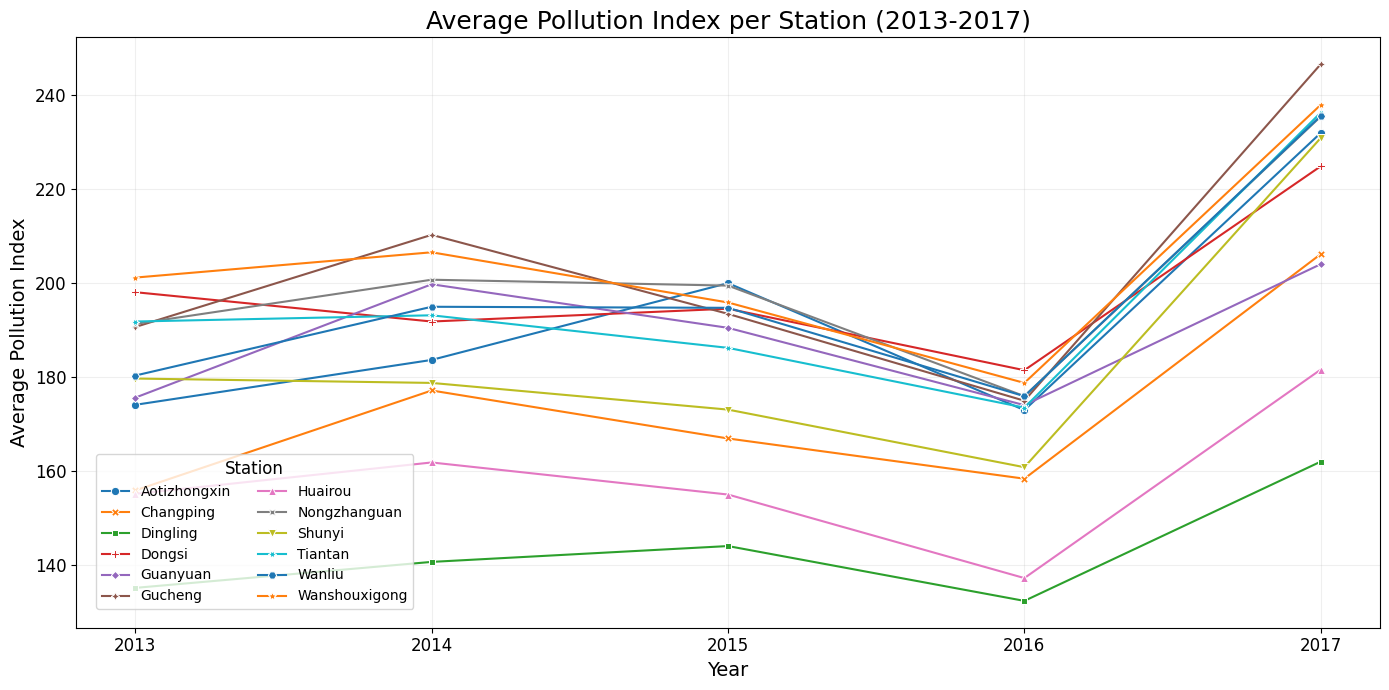

In [19]:
cd_cleaned['Pollution_Index'] = cd_cleaned[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].sum(axis=1)
weights = {
    'PM2.5': 0.3,
    'PM10': 0.2,
    'SO2': 0.1,
    'NO2': 0.1,
    'CO': 0.1,
    'O3': 0.1
}
cd_cleaned['Pollution_Index'] = (
    cd_cleaned['PM2.5'] * weights['PM2.5'] +
    cd_cleaned['PM10'] * weights['PM10'] +
    cd_cleaned['SO2'] * weights['SO2'] +
    cd_cleaned['NO2'] * weights['NO2'] +
    cd_cleaned['CO'] * weights['CO'] +
    cd_cleaned['O3'] * weights['O3']
)

yearly_pollution_avg = cd_cleaned.groupby(['year', 'station'])['Pollution_Index'].mean().unstack()
plt.figure(figsize=(14, 7))
palette = sns.color_palette("tab10", n_colors=yearly_pollution_avg.columns.size)
sns.lineplot(data=yearly_pollution_avg, markers=True, dashes=False, palette=palette)
plt.title('Average Pollution Index per Station (2013-2017)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Pollution Index', fontsize=14)
plt.xticks(ticks=range(2013, 2018), fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.2)
plt.legend(
    title='Station',
    loc='lower left',
    bbox_to_anchor=(0.01, 0.02),
    ncol=2,
    fontsize=10,
    title_fontsize=12
)
plt.tight_layout()
plt.show()

In [16]:
pollution_avg_by_station = yearly_pollution_avg.mean()
station_with_highest_pollution = pollution_avg_by_station.idxmax()
highest_pollution_value = pollution_avg_by_station.max()
print(f"Stasiun dengan indeks polusi tertinggi dari 2013 hingga 2017 adalah '{station_with_highest_pollution}' dengan rata-rata indeks polusi {highest_pollution_value:.3f}.")

Stasiun dengan indeks polusi tertinggi dari 2013 hingga 2017 adalah 'Wanshouxigong' dengan rata-rata indeks polusi 203.983.


**Insight:**
- Indeks polusi memiliki tren meningkat hingga pada tahun 2017
- Stasiun Wanshouxigong memiliki rata - rata indeks polusi paling tinggi sebesar 203.983

### Pertanyaan 2: Apa korelasi antara parameter meteorologi dengan kualitas udara pada stasiun?

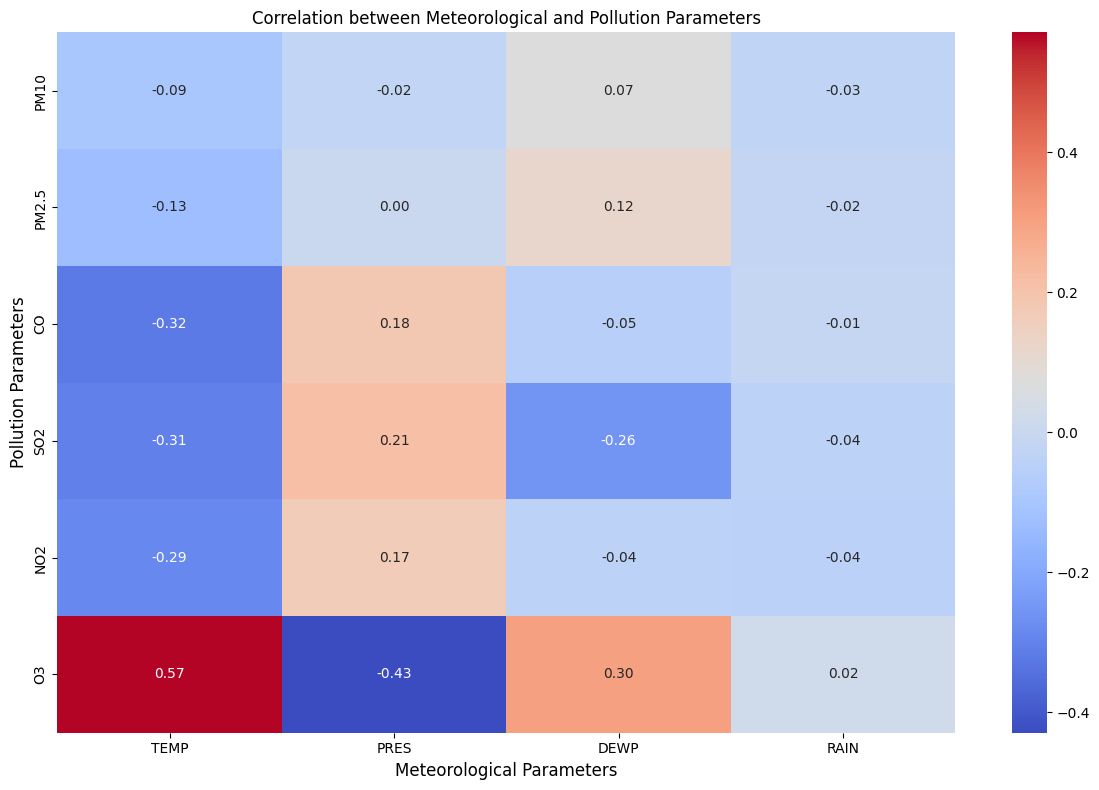

In [ ]:
pollution_params = ['PM10', 'PM2.5', 'CO', 'SO2', 'NO2', 'O3']
meteorology_params = ['TEMP', 'PRES', 'DEWP', 'RAIN']

cd_corr_filtered = cd_cleaned[pollution_params + meteorology_params]

corr_matrix = cd_corr_filtered.corr()
corr_pollution_meteorology = corr_matrix.loc[pollution_params, meteorology_params]

plt.figure(figsize=(12, 8))
sns.heatmap(corr_pollution_meteorology, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation between Meteorological and Pollution Parameters', fontsize=12)
plt.xlabel('Meteorological Parameters', fontsize=12)
plt.ylabel('Pollution Parameters', fontsize=12)
plt.tight_layout()
plt.show()


**Insight:**
- Suhu udara memiliki korelasi yang cukup kuat dengan berbagai parameter polusi khususnya dengan kadar O3
- Curah hujan memiliki korelasi paling kecil terhadap parameter polusi

## Conclusion

- Setiap stasiun memiliki tren polusi yang mirip dari tahun ke tahun. Tren indeks polusi meningkat hingga puncaknya pada tahun 2017. Stasiun yang memiliki rata rata polusi paling besar adalah Stasiun Wanshouxigong sebesar 203.983
- Parameter meteorologi seperti Suhu, tekanan, dan dan titik embun memiliki korelasi yang cukup kuat dengan parameter polusi. Dimana korelasi antara Suhu udara dengan konsentrasi O3 sebesar 0.57